In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dreamsleeplog.csv')

## Basic analysis

In [5]:
df.head()

,Date,Sleep Hours,Dream Amount,Dream Weirdness,Wake Up Feeling,Overall Day,Notes
0,May 1,9.0,9.0,9.0,9.0,9.0,NaN
1,May 2,9.0,9.0,9.0,8.5,8.0,NaN
2,May 3,8.5,7.0,7.0,7.5,6.0,NaN
3,May 4,9.0,5.0,6.0,7.0,4.0,NaN
4,May 5,5.0,4.0,4.0,4.0,4.0,coffee


In [6]:
# Basic statistics of the dataset
print(df.describe())

       Sleep Hours  Dream Amount  Dream Weirdness  Wake Up Feeling  \
count    29.000000     29.000000        29.000000        29.000000   
mean      7.948276      7.293103         7.448276         7.155172   
std       1.384511      1.436248         1.447565         1.296310   
min       5.000000      4.000000         4.000000         4.000000   
25%       8.000000      6.000000         7.000000         7.000000   
50%       8.500000      7.500000         7.000000         7.500000   
75%       9.000000      8.000000         9.000000         8.000000   
max      10.000000      9.000000        10.000000         9.000000   

       Overall Day  
count    29.000000  
mean      7.103448  
std       1.284379  
min       4.000000  
25%       7.000000  
50%       7.500000  
75%       8.000000  
max       9.000000  


## Visuals

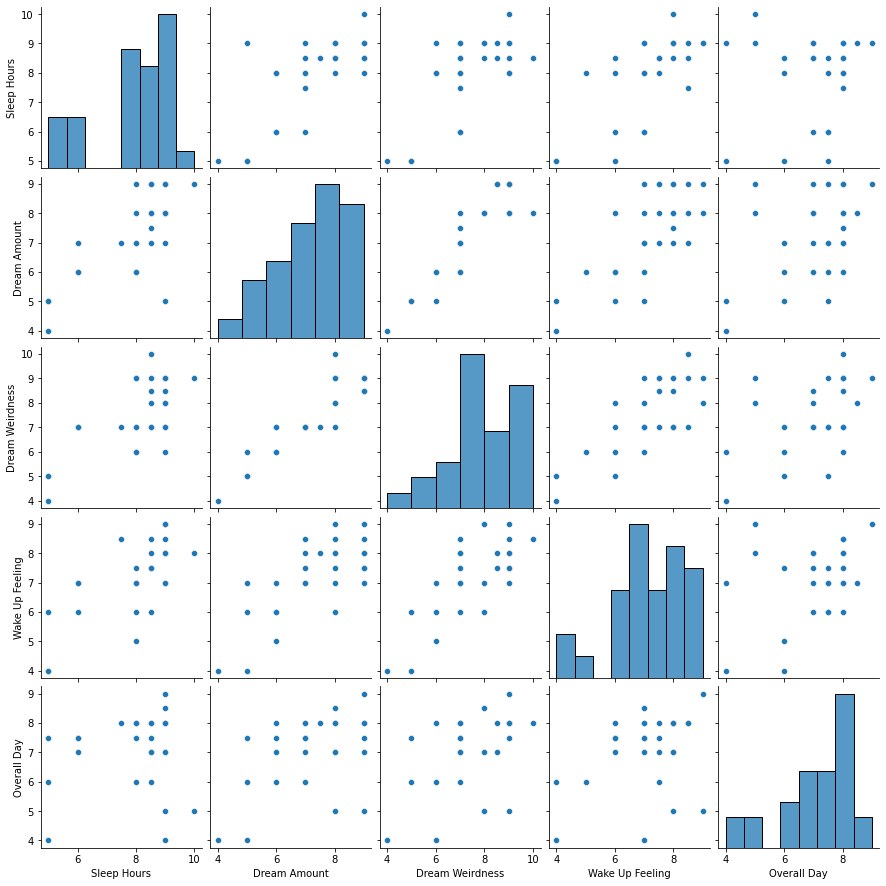

In [7]:
# Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

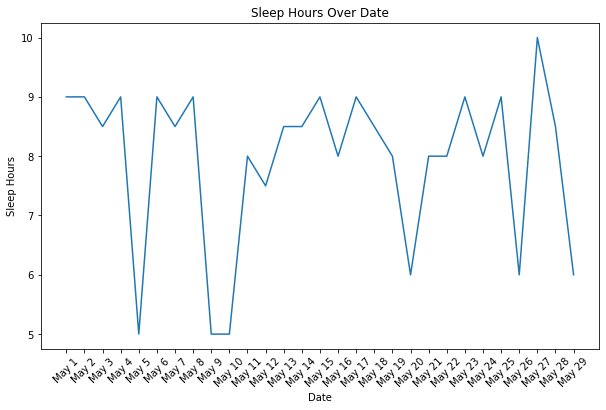

In [9]:
# Line plot for Sleep Hours over Date
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sleep Hours', data=df)
plt.xticks(rotation=45)
plt.title('Sleep Hours Over Date')
plt.show()

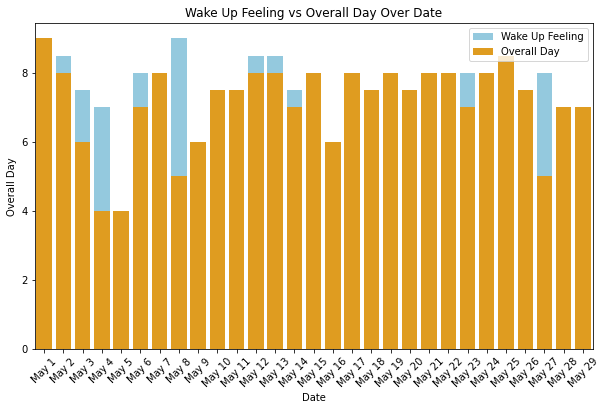

In [12]:
# Bar plot for Wake Up Feeling and Overall Day
plt.figure(figsize=(10, 6))
sns.barplot(x='Date', y='Wake Up Feeling', data=df, color='skyblue', label='Wake Up Feeling')
sns.barplot(x='Date', y='Overall Day', data=df, color='orange', label='Overall Day')
plt.xticks(rotation=45)
plt.title('Wake Up Feeling vs Overall Day Over Date')
plt.legend()
plt.show()

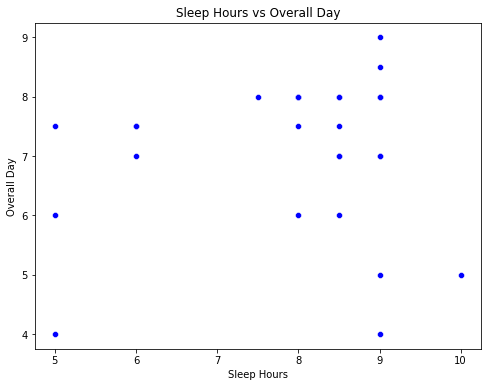

In [13]:
# Scatter plot of Sleep Hours vs Overall Day
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Hours', y='Overall Day', data=df, color='blue')
plt.title('Sleep Hours vs Overall Day')
plt.xlabel('Sleep Hours')
plt.ylabel('Overall Day')
plt.show()

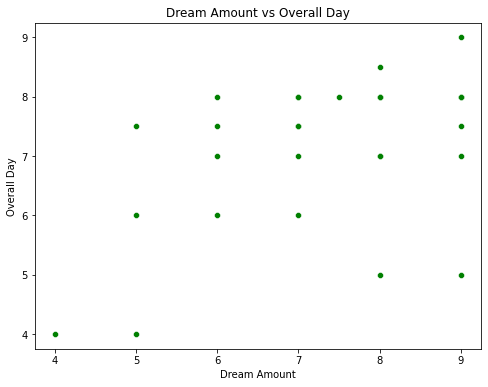

In [14]:
# Scatter plot of Dream Amount vs Overall Day
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dream Amount', y='Overall Day', data=df, color='green')
plt.title('Dream Amount vs Overall Day')
plt.xlabel('Dream Amount')
plt.ylabel('Overall Day')
plt.show()

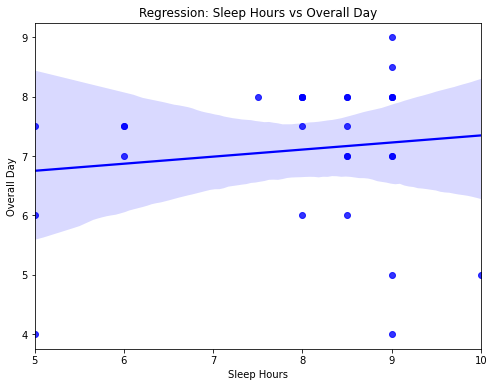

In [15]:
# Regression plot of Sleep Hours vs Overall Day
plt.figure(figsize=(8, 6))
sns.regplot(x='Sleep Hours', y='Overall Day', data=df, color='blue')
plt.title('Regression: Sleep Hours vs Overall Day')
plt.xlabel('Sleep Hours')
plt.ylabel('Overall Day')
plt.show()

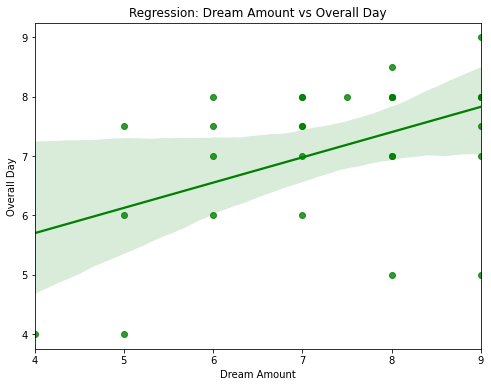

In [16]:
# Regression plot of Dream Amount vs Overall Day
plt.figure(figsize=(8, 6))
sns.regplot(x='Dream Amount', y='Overall Day', data=df, color='green')
plt.title('Regression: Dream Amount vs Overall Day')
plt.xlabel('Dream Amount')
plt.ylabel('Overall Day')
plt.show()

## Insights

### Sleep Hours vs. Overall Day:
We delved deeper into the relationship between "Sleep Hours" and "Overall Day" by creating scatter plots and regression plots. The scatter plots showed points indicating each day's sleep hours and corresponding overall day rating. The regression plots added regression lines to provide a sense of the overall trend. From these plots, we observed:

- A general positive trend between sleep hours and overall day rating.
- As sleep hours increased, there was a tendency for the overall day rating to be higher.

### Dream Amount vs. Overall Day:
Similarly, we explored the relationship between "Dream Amount" and "Overall Day." The scatter plots and regression plots revealed:
- A less clear trend between dream amount and overall day rating compared to sleep hours.
- There seemed to be some variability in the overall day rating even for days with similar dream amounts.

### Summary of Insights:
- Sleep Hours: The more sleep hours, the higher the overall day rating tends to be.
- Dream Amount: The relationship between dream amount and overall day rating is less pronounced and more variable.

### Implications:
The analysis suggests that getting sufficient sleep is more consistently associated with a better overall day rating. On the other hand, the relationship between dream amount and overall day rating is not as straightforward and might be influenced by other factors.

## Stat tests

In [18]:
from scipy.stats import pearsonr

In [19]:
# Calculate Pearson correlation coefficients
sleep_hours_corr = pearsonr(df['Sleep Hours'], df['Overall Day'])[0]
dream_amount_corr = pearsonr(df['Dream Amount'], df['Overall Day'])[0]

In [20]:
print(f"Pearson Correlation between Sleep Hours and Overall Day: {sleep_hours_corr:.2f}")
print(f"Pearson Correlation between Dream Amount and Overall Day: {dream_amount_corr:.2f}")

Pearson Correlation between Sleep Hours and Overall Day: 0.13
Pearson Correlation between Dream Amount and Overall Day: 0.48


In [21]:
# Perform statistical tests (t-test) to check if correlations are significant
from scipy.stats import ttest_rel

In [22]:
sleep_hours_array = df['Sleep Hours']
dream_amount_array = df['Dream Amount']
overall_day_array = df['Overall Day']

In [24]:
# Perform t-test for sleep hours
sleep_hours_tstat, sleep_hours_pvalue = ttest_rel(sleep_hours_array, overall_day_array)
print(f"T-Test for Sleep Hours: t-statistic = {sleep_hours_tstat:.2f}, p-value = {sleep_hours_pvalue:.4f}")

T-Test for Sleep Hours: t-statistic = 2.58, p-value = 0.0154


In [25]:
# Perform t-test for dream amount
dream_amount_tstat, dream_amount_pvalue = ttest_rel(dream_amount_array, overall_day_array)
print(f"T-Test for Dream Amount: t-statistic = {dream_amount_tstat:.2f}, p-value = {dream_amount_pvalue:.4f}")

T-Test for Dream Amount: t-statistic = 0.73, p-value = 0.4711


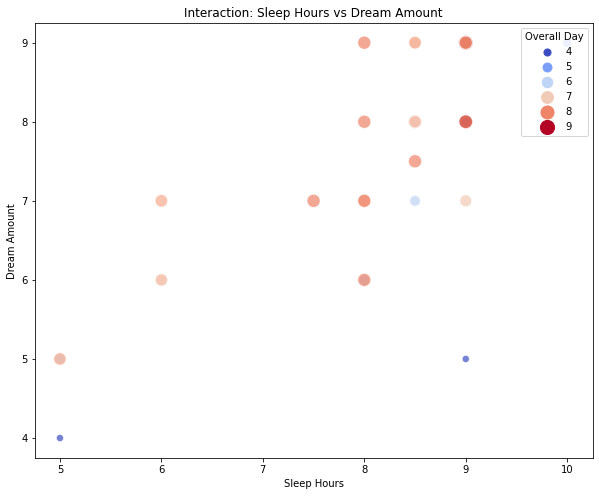

In [29]:
# Interaction visualization between Sleep Hours and Dream Amount
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(
    x='Sleep Hours', y='Dream Amount', hue='Overall Day',
    data=df, size='Overall Day', sizes=(50, 200), palette='coolwarm', alpha=0.7
)

plt.title('Interaction: Sleep Hours vs Dream Amount')
plt.xlabel('Sleep Hours')
plt.ylabel('Dream Amount')

# Customize legend
handles, labels = scatterplot.get_legend_handles_labels()
scatterplot.legend(handles, labels, title='Overall Day', loc='upper right')

plt.show()

## ML models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Splitting the data into features (X) and target (y)
X = df[['Sleep Hours', 'Dream Amount']]
y = df['Overall Day']

In [33]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Creating a Linear Regression model
model = LinearRegression()

In [35]:
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [37]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 0.52
R-squared Score: -0.08


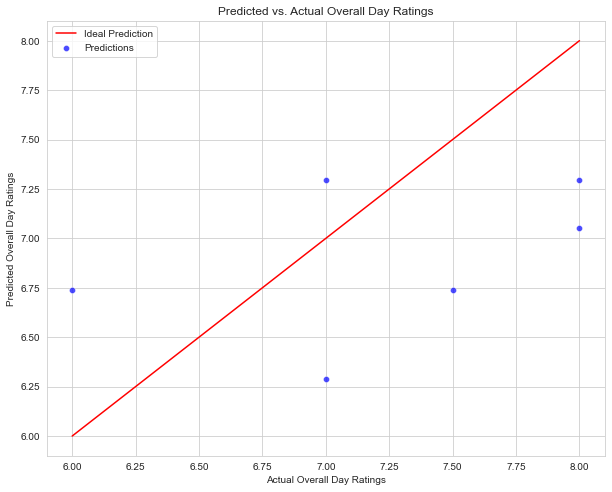

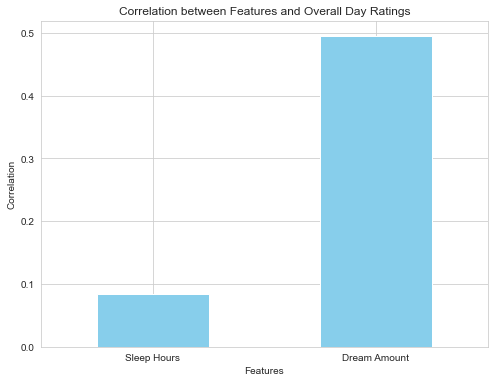

Correlation between Sleep Hours and Overall Day: 0.08
Correlation between Dream Amount and Overall Day: 0.49
Mean Squared Error: 0.52
R-squared Score: -0.08


In [40]:
# Visualizing predicted vs. actual values with line of best fit
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7, label='Predictions')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal Prediction')
plt.title('Predicted vs. Actual Overall Day Ratings')
plt.xlabel('Actual Overall Day Ratings')
plt.ylabel('Predicted Overall Day Ratings')
plt.legend()
plt.show()

# Plotting the correlation between features and target
plt.figure(figsize=(8, 6))
correlation_matrix = X_train.corrwith(y_train)
correlation_matrix.plot(kind='bar', color='skyblue')
plt.title('Correlation between Features and Overall Day Ratings')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=0)
plt.show()

print(f"Correlation between Sleep Hours and Overall Day: {correlation_matrix['Sleep Hours']:.2f}")
print(f"Correlation between Dream Amount and Overall Day: {correlation_matrix['Dream Amount']:.2f}")

# Displaying model performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

### Predicted vs. Actual Plot:

This scatter plot compares the predicted "Overall Day" ratings (y_pred) against the actual ratings (y_test).
Blue dots represent the predicted ratings, and they are scattered around the diagonal line (red) representing the ideal prediction.
The closer the blue dots are to the red line, the better the model's predictions match the actual ratings.
If the blue dots cluster tightly around the red line, it indicates strong predictive performance.
### Correlation Bar Plot:

This bar plot shows the correlation between each feature ("Sleep Hours" and "Dream Amount") and the target ("Overall Day" rating).
A positive correlation indicates that as a feature increases, the target tends to increase as well.
A negative correlation indicates that as a feature increases, the target tends to decrease.
The closer the correlation value is to 1 or -1, the stronger the correlation.
### Model Performance Metrics:

Mean Squared Error (MSE): This measures the average squared difference between the predicted and actual ratings. A lower MSE indicates better predictive performance.
R-squared Score (R2): This quantifies the proportion of variance in the target variable that the model explains. A higher R2 score indicates a better fit of the model to the data.

## Additional Model Testing

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Create models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
svr_model = SVR()

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Evaluate models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Compare model performance
print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared Score: {r2_linear:.2f}")
print()

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared Score: {r2_rf:.2f}")
print()

print("Support Vector Regressor:")
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"R-squared Score: {r2_svr:.2f}")

Linear Regression:
Mean Squared Error: 0.52
R-squared Score: -0.08

Random Forest Regressor:
Mean Squared Error: 2.32
R-squared Score: -3.85

Support Vector Regressor:
Mean Squared Error: 0.55
R-squared Score: -0.15
